<div style="text-align:center; color:  #13476a ; font-size:20px">

<h1> Análisis de sentimiento  </h1> 

Alejandro Fandiño B
</div>

- Punto 1: Hacer análisis de sentimiento de los datos del anterior taller 
    - Columna con el puntaje numérico del sentimiento
    - Pueden usar cualquiera de las librerias vistas en clase
    
- Punto 2: ¿Cuál es el tuit más positivo y más negativo?

- Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?
    - Diagrama de barras de la pregunta 3
    - Nubes de palabras por sentimiento




## Punto 1: Hacer análisis de sentimiento de los datos del anterior taller

In [1]:
from googletrans import Translator
import pandas as pd
import re

In [5]:
data = pd.read_csv('datos.csv', sep=',')
data = data.sample(100,random_state=1)
data.head()

,tweet,date,city,user_location,place,coordinates,id,link
304,@ClaudiaLopez Señora Claudia hágase esta pregu...,2020-11-08 18:29:23,Bogota,Bogotá Colombia,NaN,NaN,1325505711628054534,https://twitter.com/i/web/status/1325505711628...
340,Debe ser un policía venezolano: Claudia López ...,2020-11-08 12:36:49,Bogota,"Bogota, Colombia",Place(_api=<tweepy.api.API object at 0x0000022...,NaN,1325416985895825410,https://twitter.com/i/web/status/1325416985895...
47,Con abucheos y gritos recibieron a Claudia Lóp...,2020-11-11 23:07:45,Bogota,Bogotá,NaN,NaN,1326662928674811904,https://twitter.com/i/web/status/1326662928674...
67,La alcaldesa Claudia López inauguró la Tropa S...,2020-11-11 17:07:38,Bogota,"Bogotá, Colombia",NaN,NaN,1326572304353128448,https://twitter.com/i/web/status/1326572304353...
479,Colegios públicos de Bogotá iniciarán clases p...,2020-11-07 00:59:02,Bogota,Bogotá,NaN,NaN,1324878998049083393,https://twitter.com/i/web/status/1324878998049...


In [6]:
# Traduccion a ingles
translator = Translator()
data['ing'] = data['tweet'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,ing,ingles
304,@ClaudiaLopez Señora Claudia hágase esta pregu...,2020-11-08 18:29:23,Bogota,Bogotá Colombia,NaN,NaN,1325505711628054534,https://twitter.com/i/web/status/1325505711628...,"Translated(src=en, dest=en, text=@ClaudiaLopez...",@ClaudiaLopez Señora Claudia hágase esta pregu...
340,Debe ser un policía venezolano: Claudia López ...,2020-11-08 12:36:49,Bogota,"Bogota, Colombia",Place(_api=<tweepy.api.API object at 0x0000022...,NaN,1325416985895825410,https://twitter.com/i/web/status/1325416985895...,"Translated(src=en, dest=en, text=Debe ser un p...",Debe ser un policía venezolano: Claudia López ...
47,Con abucheos y gritos recibieron a Claudia Lóp...,2020-11-11 23:07:45,Bogota,Bogotá,NaN,NaN,1326662928674811904,https://twitter.com/i/web/status/1326662928674...,"Translated(src=en, dest=en, text=Con abucheos ...",Con abucheos y gritos recibieron a Claudia Lóp...
67,La alcaldesa Claudia López inauguró la Tropa S...,2020-11-11 17:07:38,Bogota,"Bogotá, Colombia",NaN,NaN,1326572304353128448,https://twitter.com/i/web/status/1326572304353...,"Translated(src=en, dest=en, text=La alcaldesa ...",La alcaldesa Claudia López inauguró la Tropa S...
479,Colegios públicos de Bogotá iniciarán clases p...,2020-11-07 00:59:02,Bogota,Bogotá,NaN,NaN,1324878998049083393,https://twitter.com/i/web/status/1324878998049...,"Translated(src=en, dest=en, text=Colegios públ...",Colegios públicos de Bogotá iniciarán clases p...


In [7]:
# Sentimiento
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,ing,ingles,sentimiento
304,@ClaudiaLopez Señora Claudia hágase esta pregu...,2020-11-08 18:29:23,Bogota,Bogotá Colombia,NaN,NaN,1325505711628054534,https://twitter.com/i/web/status/1325505711628...,"Translated(src=en, dest=en, text=@ClaudiaLopez...",@ClaudiaLopez Señora Claudia hágase esta pregu...,0.0
340,Debe ser un policía venezolano: Claudia López ...,2020-11-08 12:36:49,Bogota,"Bogota, Colombia",Place(_api=<tweepy.api.API object at 0x0000022...,NaN,1325416985895825410,https://twitter.com/i/web/status/1325416985895...,"Translated(src=en, dest=en, text=Debe ser un p...",Debe ser un policía venezolano: Claudia López ...,0.0
47,Con abucheos y gritos recibieron a Claudia Lóp...,2020-11-11 23:07:45,Bogota,Bogotá,NaN,NaN,1326662928674811904,https://twitter.com/i/web/status/1326662928674...,"Translated(src=en, dest=en, text=Con abucheos ...",Con abucheos y gritos recibieron a Claudia Lóp...,0.0
67,La alcaldesa Claudia López inauguró la Tropa S...,2020-11-11 17:07:38,Bogota,"Bogotá, Colombia",NaN,NaN,1326572304353128448,https://twitter.com/i/web/status/1326572304353...,"Translated(src=en, dest=en, text=La alcaldesa ...",La alcaldesa Claudia López inauguró la Tropa S...,0.0
479,Colegios públicos de Bogotá iniciarán clases p...,2020-11-07 00:59:02,Bogota,Bogotá,NaN,NaN,1324878998049083393,https://twitter.com/i/web/status/1324878998049...,"Translated(src=en, dest=en, text=Colegios públ...",Colegios públicos de Bogotá iniciarán clases p...,0.0


In [8]:
import numpy as np
cut = pd.cut(data['sentimiento'],[-np.inf, -.01, .01, np.inf],labels=['negativo', 'neutro', 'positivo'])
data['polarity'] = cut.values
data[['polarity','sentimiento']].head()

,polarity,sentimiento
304,neutro,0.0
340,neutro,0.0
47,neutro,0.0
67,neutro,0.0
479,neutro,0.0


In [9]:
data[['tweet', 'sentimiento','polarity']].sort_values('sentimiento')

,tweet,sentimiento,polarity
173,"No un día sin Claudia López, los tres años res...",-0.8555,negativo
187,"Claudia López quiere imponer día sin carne, pe...",-0.8555,negativo
179,"@rodrigoaguaclar @fva_v2 @ClaudiaLopez Profe, ...",-0.7192,negativo
277,@KikePrivatiza @manuc232 Claudia López compara...,-0.7003,negativo
147,@Liliana53960099 @ClaudiaLopez todo por ese ad...,-0.7003,negativo
...,...,...,...
17,.@ClaudiaLopez no solo tiene el reto de reduci...,0.0516,positivo
339,@dora_garavito @ClaudiaLopez Feliz mente casad...,0.4466,positivo
119,#ParesInforma l Asamblea de Venezuela pide a C...,0.4588,positivo
444,@GarciaColorad0 Por lo menos actualicé. Martuc...,0.9595,positivo


## Punto 2: ¿Cuál es el tuit más positivo y más negativo?

#### Tweet más positivo

In [10]:
data.sentimiento.max()

0.9766

In [11]:
indexM = data.sentimiento.idxmax(axis=1)
indexM

406

In [12]:
data.loc[406]['tweet']

'@JaviCruzN1 Jajajaja Claudia López siempre callando bocas 🤣🤣🤣🤭🤭🤭🤭🤭 https://t.co/4oSAn1IDjE'

#### Tweet más negativo

In [13]:
data.sentimiento.min()

-0.8555

In [14]:
indexm = data.sentimiento.idxmin(axis=1)
indexm

173

In [15]:
data.loc[173]['tweet']

'No un día sin Claudia López, los tres años restantes sin ella y que Dios nos ayude para lograrlo. Que tristeza que los medios se vendan para dar una imagen errada de su pésimo gobierno https://t.co/mUKP8SsokS'

## Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [16]:
print('Número de tweets negativos:' , len(data.sentimiento.loc[data.sentimiento<0]))

Número de tweets negativos: 33


In [17]:
print('Número de tweets positivos:' ,len(data.sentimiento.loc[data.sentimiento>0]))

Número de tweets positivos: 5


In [18]:
print('Número de tweets neutros:' ,len(data.sentimiento.loc[data.sentimiento==0]))

Número de tweets neutros: 62


## Bono 1

Text(0, 0.5, 'Frecuencia')

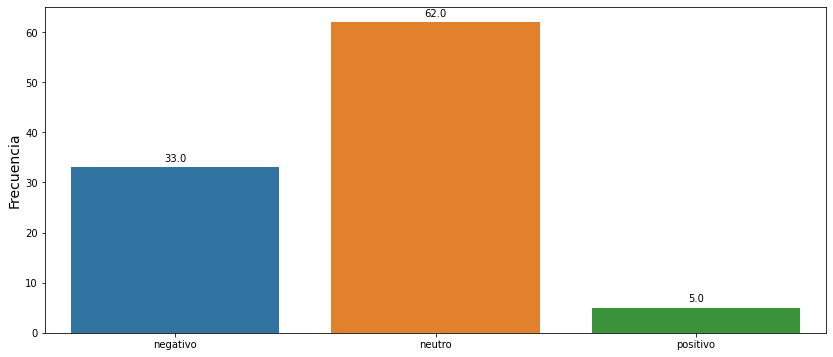

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
polarity = data['polarity'].value_counts()
splot=sns.barplot(x=polarity.index,y=polarity.values,data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("Frecuencia", size=14)

## Bono 2

In [20]:
import re 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")

    return text, links, hashtags, mentions

In [21]:
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

#### Nube de palabras negativas

In [22]:
negativo=data.loc[data.sentimiento<0]
negativo = negativo.copy()

In [24]:
negativo[['clean', 'links', 'hashtags', 'mentions']] = negativo.apply(text_clean, axis=1, result_type='expand')

In [25]:
negativo['pp'] = negativo['clean'].apply(lambda texto: pre_procesado(texto))

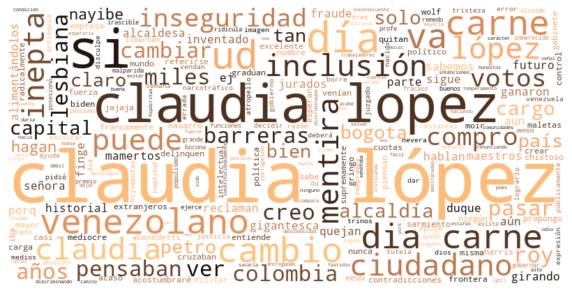

In [26]:
palabras = negativo.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='copper_r',
                     stopwords=stopwords_sp,).generate(palabras)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

#### Nube de palabas positivas

In [27]:
positivo = data.loc[data.sentimiento>0]
positivo = positivo.copy()

In [28]:
positivo[['clean', 'links', 'hashtags', 'mentions']] = positivo.apply(text_clean, axis=1, result_type='expand')
positivo['pp'] = positivo['clean'].apply(lambda texto: pre_procesado(texto))

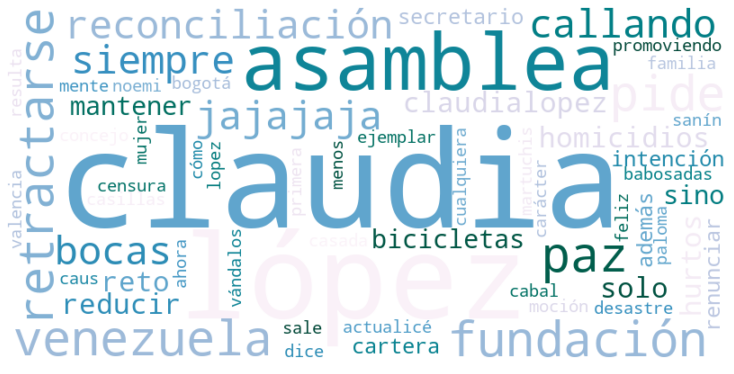

In [29]:
palabras = positivo.pp.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='PuBuGn_r',
                     stopwords=stopwords_sp,
                     contour_width=0.5, contour_color='orange').generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()